# Sales Analysis

#### Import necessary libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Merge data from each month into one CSV

In [3]:
path = "/content/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)


#### Read in updated dataframe

In [5]:
all_data = pd.read_csv("/content/all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Data Cleaning: !
The first step in this is figuring out what we need to clean. I *have* found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [6]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


##### Get rid of text in order date column

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


#### Add month column (alternative method)

In [10]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,1


#### Add city column

In [11]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,1,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,1,Austin (TX)


## Data Exploration!

#### Question 1: What is the total sale?


In [12]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']
total_sales = all_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(total_sales)


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64


In [13]:
print(all_data.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Month 2', 'City', 'Sales'],
      dtype='object')


### Question 2:What is the average sales?

In [14]:
average_sales = all_data['Sales'].mean()
print(average_sales)


185.490916751815


#### Question 3: What was the best month for sales? How much was earned that month?

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [16]:
all_data.groupby(['Month']).sum()

<ipython-input-16-dce0a735c05d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


range(1, 13)


<ipython-input-17-c6c5ff65cdb6>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])


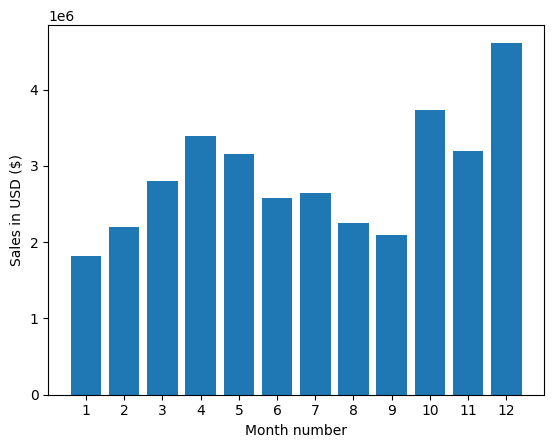

In [17]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 4: What city sold the most product?

In [18]:
all_data.groupby(['City']).sum()

<ipython-input-18-5659d6263041>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


<ipython-input-19-9cd01a3bb23d>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-19-9cd01a3bb23d>:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in all_data.groupby(['City'])]
<ipython-input-19-9cd01a3bb23d>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys, all_data.groupby(['City']).sum()['Sales'], color='pu

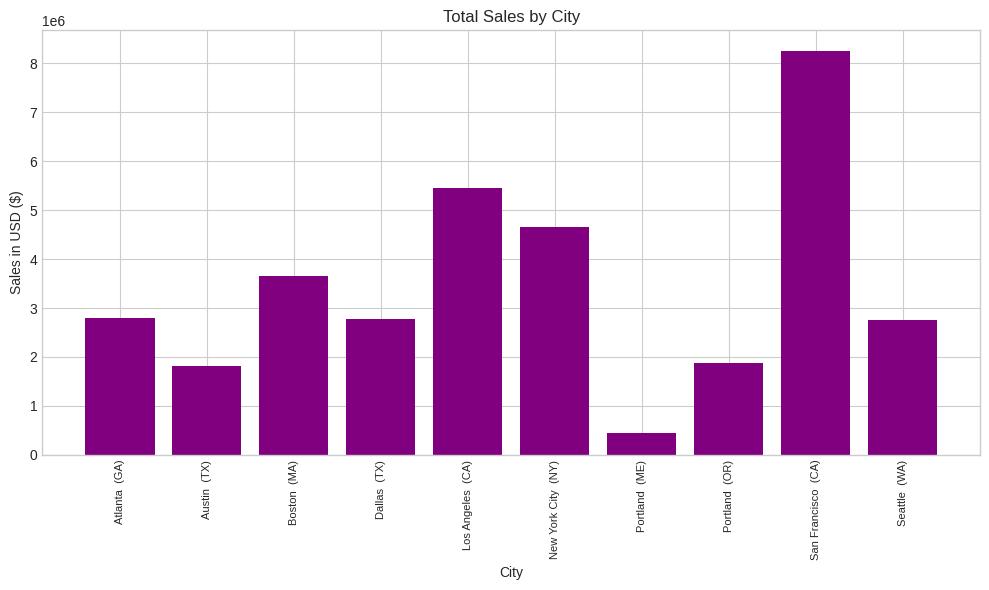

In [19]:
import matplotlib.pyplot as plt


plt.style.use('seaborn-whitegrid')

keys = [city for city, df in all_data.groupby(['City'])]

plt.figure(figsize=(10, 6))
plt.bar(keys, all_data.groupby(['City']).sum()['Sales'], color='purple')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.xticks(rotation='vertical', size=8)
plt.tight_layout()  # To avoid label cutoffs
plt.show()


#### Question 5: what is the  sales analysis by category?






In [20]:
sales_by_category = all_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)
print(sales_by_category)



Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64


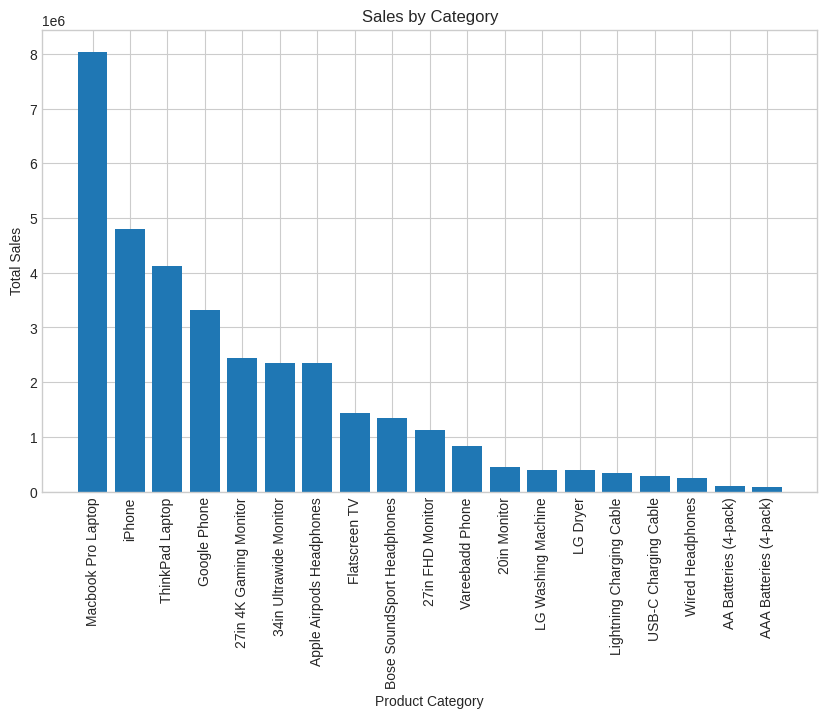

In [21]:
import matplotlib.pyplot as plt

# Calculate total sales by category
sales_by_category = all_data.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category.index, sales_by_category)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales by Category')
plt.show()



#### Question 6: What are the total sales for each region?

In [22]:
sales_by_region = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(sales_by_region)


City
San Francisco  (CA)    8262203.91
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Boston  (MA)           3661642.01
Atlanta  (GA)          2795498.58
Dallas  (TX)           2767975.40
Seattle  (WA)          2747755.48
Portland  (OR)         1870732.34
Austin  (TX)           1819581.75
Portland  (ME)          449758.27
Name: Sales, dtype: float64


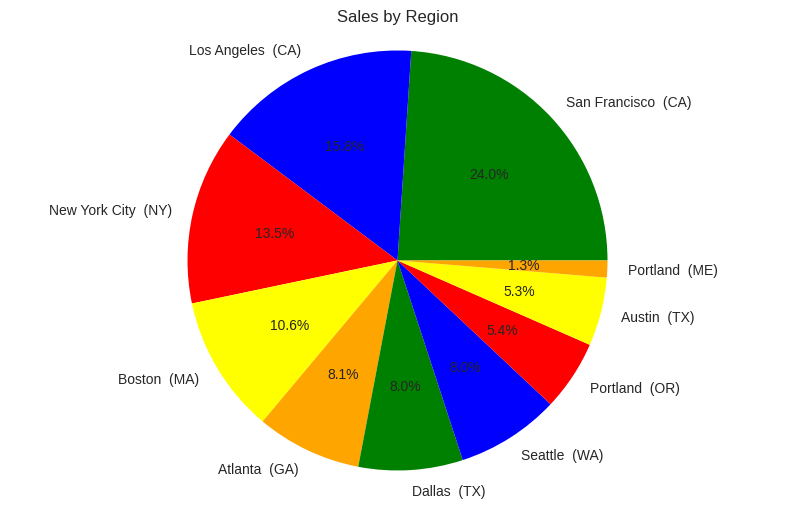

In [23]:
import matplotlib.pyplot as plt

sales_by_region = all_data.groupby('City')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', colors=['green', 'blue', 'red', 'yellow', 'orange'])
plt.axis('equal')
plt.title('Sales by Region')
plt.show()


#### Question 7:Is there a correlation between the quantity ordered and the price of products?


In [24]:

all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

correlation_data = all_data[['Quantity Ordered', 'Price Each', 'Hour', 'Sales']]

correlation_matrix = correlation_data.corr()

print(correlation_matrix)
# The correlation matrix provides the correlation coefficient between 'Quantity Ordered' and 'Price Each'.
# Positive correlation close to +1: Indicates that as the quantity ordered increases, the price tends to be higher.
# Negative correlation close to -1: Indicates that as the quantity ordered increases, the price tends to be lower.
# Correlation coefficient close to 0: Suggests a weak or no correlation between the quantity ordered and the price of products.


                  Quantity Ordered  Price Each      Hour     Sales
Quantity Ordered          1.000000   -0.148272 -0.002218 -0.139417
Price Each               -0.148272    1.000000  0.001721  0.999203
Hour                     -0.002218    0.001721  1.000000  0.001668
Sales                    -0.139417    0.999203  0.001668  1.000000


#### Question 8: What products are most often sold together?

In [27]:


# Filter the DataFrame to include only rows with duplicated 'Order ID'
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Create a new 'Grouped' column that contains a comma-separated list of products for each order
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates to keep only unique Order ID and their corresponding grouped products
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

# Display the DataFrame showing which products are sold together
print(df2.head())


    Order ID                                         Grouped
41    141275           USB-C Charging Cable,Wired Headphones
57    141290  Apple Airpods Headphones,AA Batteries (4-pack)
133   141365                Vareebadd Phone,Wired Headphones
153   141384               Google Phone,USB-C Charging Cable
220   141450         Google Phone,Bose SoundSport Headphones


<ipython-input-27-d3f8c666d789>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [28]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


####Question 9: What product sold the most? Why do you think it sold the most?

Product
AAA Batteries (4-pack)    31017
Name: Quantity Ordered, dtype: int64


<ipython-input-29-8c01f97e5e0e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


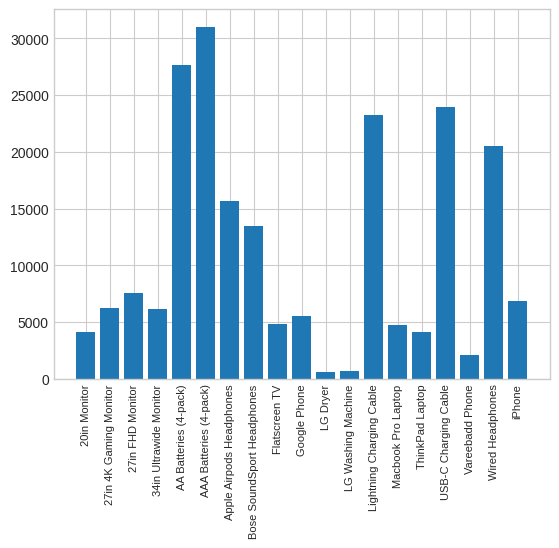

In [29]:
most_sold_product = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(1)
print(most_sold_product)

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-30-ed0286e2ba68>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
<ipython-input-30-ed0286e2ba68>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity_ordered.index, rotation='vertical', size=8)


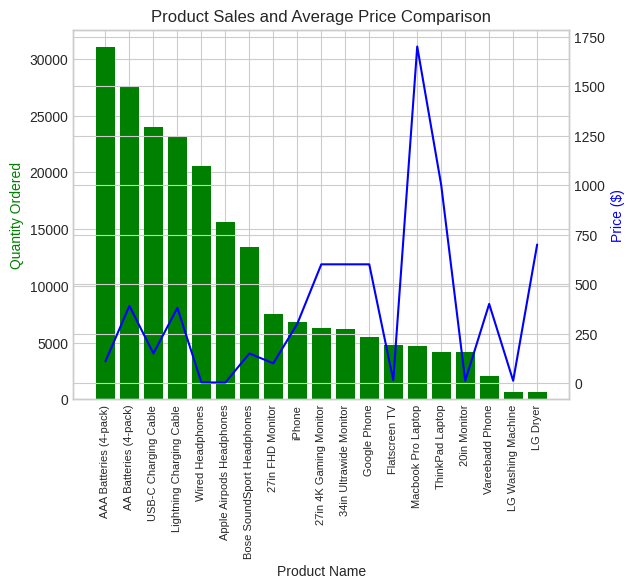

In [30]:
#"Product Sales and Average Price Comparison"

import matplotlib.pyplot as plt

prices = all_data.groupby('Product').mean()['Price Each']
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(quantity_ordered.index, quantity_ordered, color='g')
ax2.plot(quantity_ordered.index, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(quantity_ordered.index, rotation='vertical', size=8)

# Set the chart title
plt.title('Product Sales and Average Price Comparison')

plt.show()


# Recommendation!


####Question 10: What time should we display advertisements to maximize likelihood of customer's buying product?

In [83]:

# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,1,Boston (MA),700.00,21,25,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,1,Portland (OR),14.95,14,15,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,1,San Francisco (CA),23.98,13,33,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,1,Los Angeles (CA),149.99,20,33,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,1,Austin (TX),11.99,11,59,1


<ipython-input-31-545a18243b57>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Hour'])]


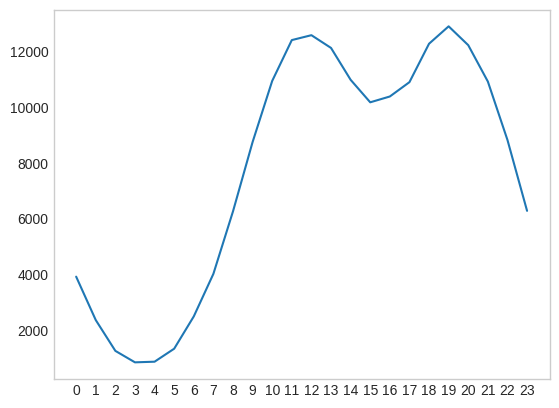

In [31]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

###Question 11:"Which product among the top 10 high-profit products is the most profitable and why?"

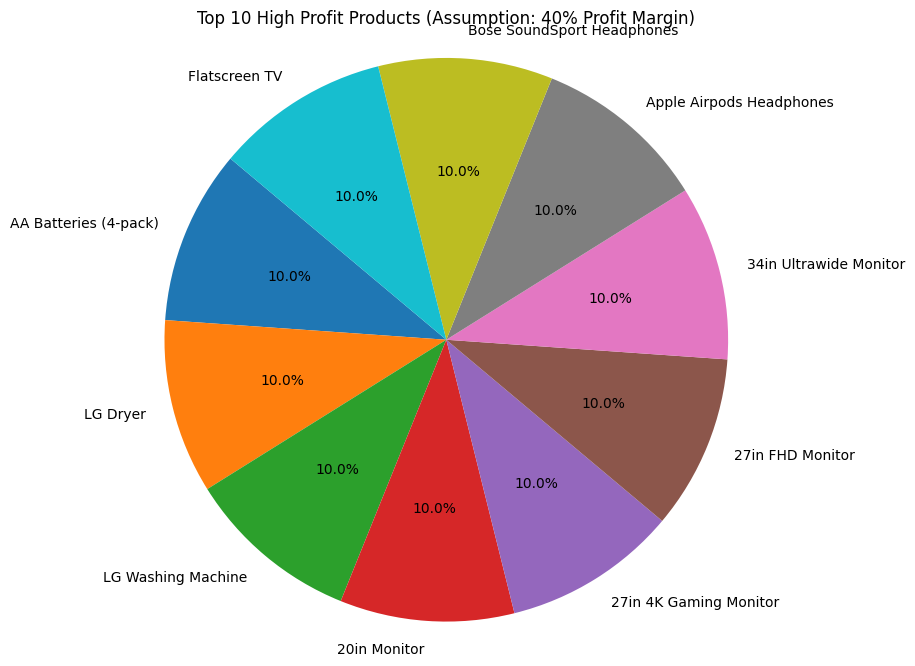

In [95]:


df = pd.read_csv('/content/all_data_copy.csv')

# Assuming you have a 'Cost of Goods Sold' column in the dataset
# Calculate profit margin for each product (Assuming fixed profit margin of 40%)
profit_margin_assumption = 0.4  # 40% profit margin assumption
df['Profit Margin'] = profit_margin_assumption

# High profit products (top 10)
high_profit_products = df.groupby('Product')['Profit Margin'].mean().nlargest(10)

# Visualization - Pie Chart for High Profit Products
plt.figure(figsize=(8, 8))
plt.pie(high_profit_products.values, labels=high_profit_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 High Profit Products (Assumption: 40% Profit Margin)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()